# Линейные методы в машинном обучении

Загрузим необходимые библиотеки

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Линейная регрессия

Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть:
$$ y = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b,$$
где у - целевая переменная (что мы хотим предсказать), $x_i$ -- признак объекта х, $w_i$ -- вес i-го признака, b -- bias (смещение, свободный член)

Часто предполагают, что объект х содержит в себе фиктивный признак, который всегда равен 1, тогда bias это есть вес этого признака. В этом случае формула принимает простой вид:
$$ y = <w, x>. $$

В матричной форме, в случае, когда у нас есть n объектов формулу можно переписать следующим образом:
$$ Y = Xw,$$
Y -- вектор размера n, X -- матрица объекты-признаки размера $n \times k$, w -- вектор весов размера k.

Решение по методу наименьших квадратов дает 
$$ w = (X^TX)^{-1}X^TY $$

Сгенерируем искусственные данные. 

In [3]:
X = np.linspace(-5, 5, 20)
y = 10 * X - 7

X_train = X[0::2].reshape(-1, 1)
y_train = y[0::2] + np.random.randn(10) * 10

X_test = X[1::2].reshape(-1, 1)
y_test = y[1::2] + np.random.randn(10) * 10

In [4]:
np.random.randn(10) * 10

array([ -6.10169758, -20.14274099, -13.45368025, -27.85806482,
        20.87289804,  -6.29492867,  -8.24405261,  -1.79463866,
       -13.67396325,  -5.9061985 ])

Визуализируем данные, используя библиотеку matplotlib.

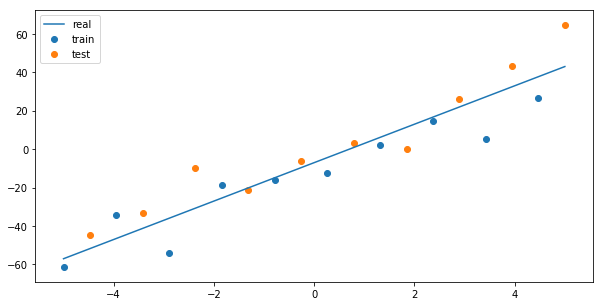

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.show()

Обучим нашу модель на тренировочной выборке и предскажем значения на тесте.
Предсказанные ответы сохраним в переменную $\textbf{predictions}$, а веса модели сохраним в переменные $\textbf{w}$, $b$.

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression()

model.fit(X_train, y_train)

w = model.coef_
b = model.intercept_

Визуализируем предсказания.

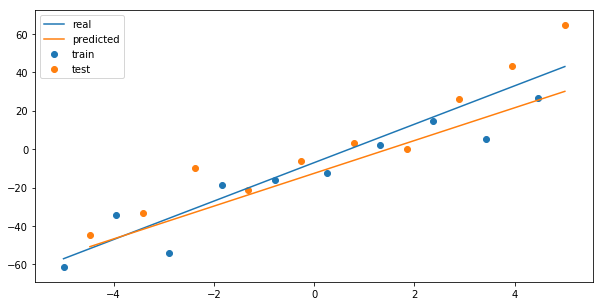

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X[1::2], X[1::2].reshape(-1, 1).dot(w) + b, label='predicted')
plt.legend()
plt.show()

## Оценка результатов

Вычислим среднеквадратичную ошибку на трейне и на тесте. Также вычислим среднюю абсолютную ошибку.

In [10]:
from sklearn.metrics import mean_squared_error

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

print('Train MSE: ', mean_squared_error(y_train, y_train_predicted))
print('Test MSE: ', mean_squared_error(y_test, y_test_predicted))

Train MSE:  74.1879397704218
Test MSE:  270.61874738613153


In [11]:
from sklearn.metrics import mean_absolute_error

print('Train MAE: ', mean_absolute_error(y_train, y_train_predicted))
print('Test MAE: ', mean_absolute_error(y_test, y_test_predicted))

Train MAE:  7.197102945216246
Test MAE:  13.182680323278557


# Реальный датасет

Будем работать с датасетом boston. Этот датасет описывает средние цены на недвижимость в районах Бостона в $1000. 
Примеры признаков города: количество преступлений на душу населения, процент старых домов в районе, количество учеников на одного учителя и т.д.

Загрузим датасет, выведем информацию

In [12]:
from sklearn.datasets import load_boston

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [13]:
house_data = load_boston()

In [14]:
print(house_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [15]:
X = pd.DataFrame(house_data['data'], columns=house_data['feature_names'])
y = house_data['target']

In [16]:
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

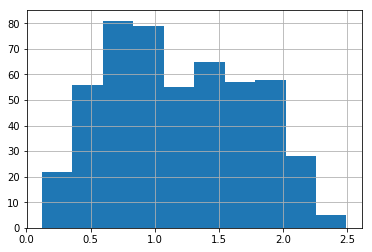

In [17]:
np.log(X['DIS']).hist()

Визуализируем распределения признаков в датасете

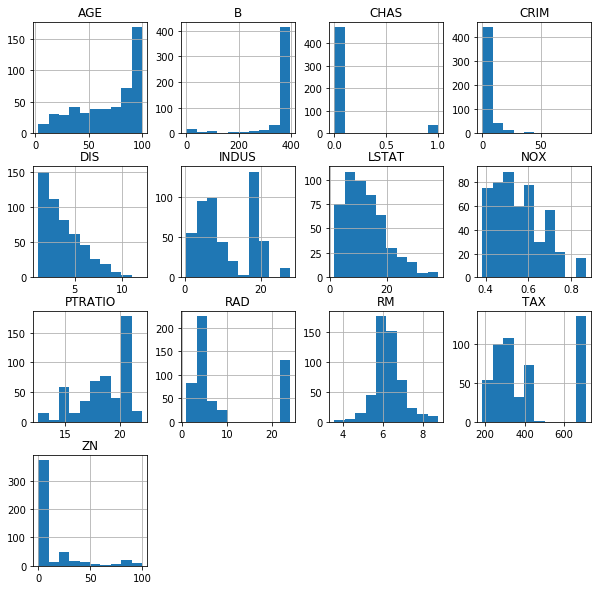

In [18]:
_ = X.hist(X.columns, figsize=(10, 10))

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


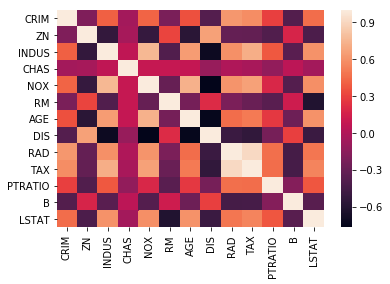

In [19]:
import seaborn as sns

sns.heatmap(X.corr())

In [20]:
X['DIS'] = np.log(X['DIS'])

Сделаем предсказание: какие факторы окажутся наиболее значимыми и в какую сторону?

## Обучение на реальных данных

Разобьём выборку на train и test в соотношении 70/30.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

/Users/ilya-grid/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Выполним нормировку данных

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Обучим линейную регрессию и подсчитаем её качество на тесте.

In [33]:
model = LinearRegression()

model.fit(X_train, y_train)

y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

In [34]:
print('Train MSE: ', mean_squared_error(y_train, y_train_prediction))
print('Test MSE: ', mean_squared_error(y_test, y_test_prediction))

print('Train MAE: ', mean_absolute_error(y_train, y_train_prediction))
print('Test MAE: ', mean_absolute_error(y_test, y_test_prediction))

Train MSE:  17.638756609849843
Test MSE:  28.13536330928131
Train MAE:  3.0873846274454926
Test MAE:  3.5807096815401116


Тоже самое при помощи sklearn.pipeline

In [37]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('regression', LinearRegression())
])

In [38]:
pipeline.fit(X_train, y_train)

print('Train MSE: ', mean_squared_error(y_train, pipeline.predict(X_train)))
print('Test MSE: ', mean_squared_error(y_test, pipeline.predict(X_test)))

print('Train MAE: ', mean_absolute_error(y_train, pipeline.predict(X_train)))
print('Test MAE: ', mean_absolute_error(y_test, pipeline.predict(X_test)))

Train MSE:  17.638756609849843
Test MSE:  28.13536330928132
Train MAE:  3.0873846274454926
Test MAE:  3.5807096815401116


Визуализируем получившиеся веса

<BarContainer object of 13 artists>

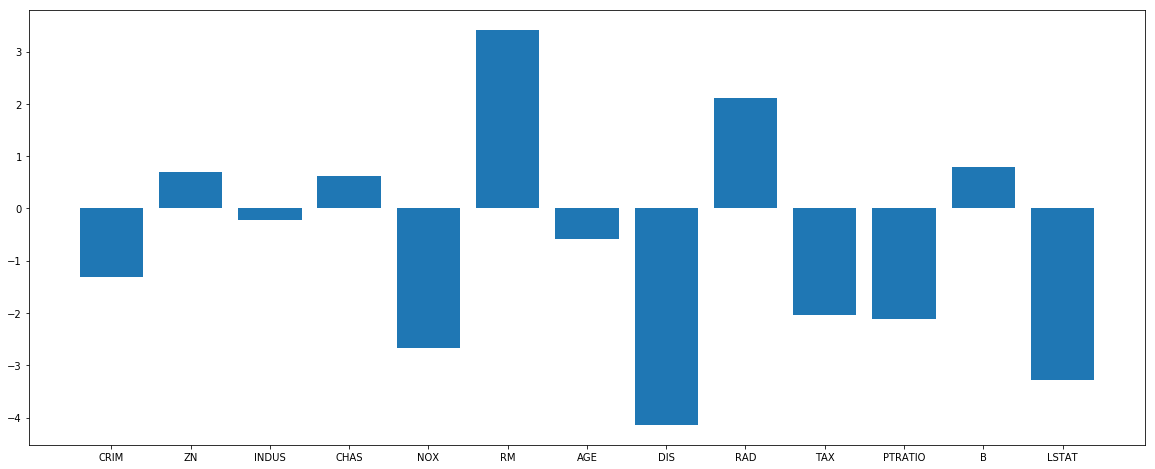

In [39]:
plt.figure(figsize=(20, 8))
plt.bar(X.columns, model.coef_)

Сделайте выводы. Какие факторы оказались самыми значимым? Какие оказались незначимыми? Подтвердились ли ваши догадки?

# Линейные методы классификации

In [40]:
import numpy as np
import matplotlib.pyplot as plt

Создадим два кластера с данными для решения задачи классификации.

In [41]:
from sklearn.datasets import make_blobs

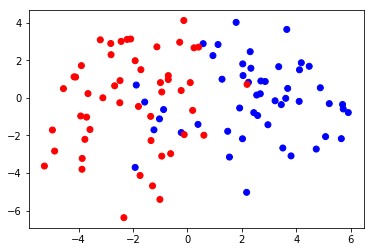

In [42]:
colors = ("red", "blue")
X, y = make_blobs(n_samples=100, centers=[[-2,0], [2,0]], random_state=20, cluster_std=2)

colored_y = np.zeros(y.size, dtype=str)
for i in range(2):
    colored_y[y == i] = colors[i]
    
plt.scatter(X[:, 0], X[:, 1], c=colored_y)

In [43]:
x_min, x_max = -12, 12
y_min, y_max = -10, 10
h = 0.05
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

## Обучим логистическую регрессию

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
model = LogisticRegression()
model.fit(X, y)

/Users/ilya-grid/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Визуализируем предсказания

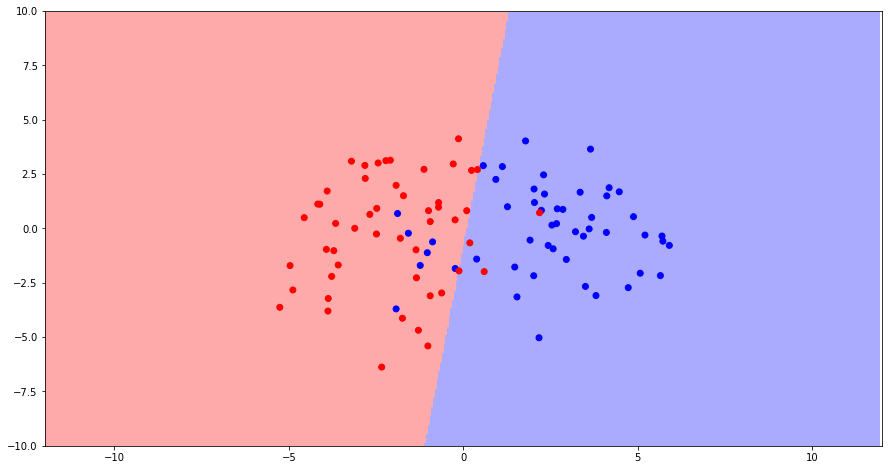

In [46]:
plt.figure(figsize=(15,8))

plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

## Реальный датасет

Рассмотрим работу алгоритмов линейной классификации для задачи breast cancer. Датасет содержит в себе данные о пациентках. Целевая переменная --- определить, болеет ли пациентка раком груди.

In [47]:
from sklearn.datasets import load_breast_cancer

In [48]:
data = load_breast_cancer()

In [49]:
print(data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [50]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

In [51]:
np.unique(y, return_counts=True)

(array([0, 1]), array([212, 357]))

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [53]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


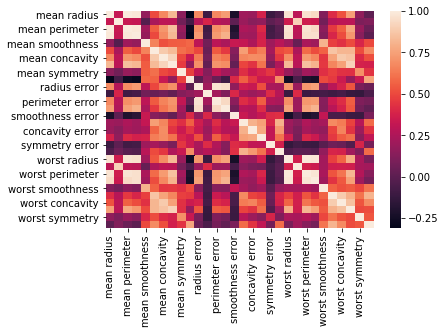

In [54]:
sns.heatmap(X.corr())

Первый метод --- логистическая регрессия. Несмотря на название, данный метод применяется именно в задачах классификации. Регрессия служит указанием на то, что мы пытаемся предсказать вероятность принадлежности классу

## Логистическая регрессия

Разбейте выборку на трейн и тест в соотношении 4:1. Обучите модель и предскажите вероятности классов 0 и 1 (это можно сделать с помощью метода $\textbf{predict_proba}$)

In [55]:
X_train, X_test, y_train, y_test = #Ваш код

SyntaxError: invalid syntax (<ipython-input-55-209d980a6a12>, line 1)

In [56]:
model = LogisticRegression()

#Ваш код

predictions = #Ваш код

SyntaxError: invalid syntax (<ipython-input-56-da5e2f9d6361>, line 5)

In [ ]:
predictions.shape

Подсчитаем accuracy и roc-auc наших предсказаний

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score

In [ ]:
accuracy_score(y_test, predictions[:, 1] > 0.5)

In [ ]:
fpr, tpr, _ = roc_curve(y_test, predictions[:, 1])
auc = roc_auc_score(y_test, predictions[:, 1])

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.show()

In [ ]:
auc

# Предсказание отклика на маркетинговую кампанию

Возьмем датасет содержащий информацию о клиентах и маркетинговой кампании некоторого банка. Наша задача --- предсказать успешность кампании для каждого клиента. Признаками являются различные характеристики клиента и кампании.

Какие признаки вы бы использовали?

In [ ]:
import pandas as pd

http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [ ]:
# Считаем данные
data = pd.read_csv('bank-additional-full.csv', sep=';')

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
X = data.iloc[:, :-1].copy()
y = data.iloc[:, -1].copy()

# Бинаризуем таргет
from sklearn.preprocessing import LabelBinarizer
y = LabelBinarizer().fit_transform(y).ravel()

Классы очень несбалансированы:

In [ ]:
y.mean()

Заметим, что среди признаков достаточно много категориальных, в то время как линейные модели работают с числовыми признаками.

Одним из способов получить числовые значения категориальных параметров является One-hot encoding. Его суть состоит в том, что для каждого категориального признака $f$ и каждого его значения $v$ создается новый признак, который равен 1 если у объекта значение $f$ равно $v$ и 0 иначе.

One-hot encoding с помощью pandas можно сделать одной строчкой:

In [ ]:
X = pd.get_dummies(X)

# Обратите внимание на признаки
X.info()

Разобьем выборку на трейн и тест

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Обучим линейный SVM с балансировкой классов

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svm = SVC(kernel='linear', class_weight='balanced')
model_svm.fit(X_train, y_train)

y_pred = model_svm.predict(X_test)
print('Test accuracy: ', accuracy_score(y_test, y_pred))
print('Test F measure: ', f1_score(y_test, y_pred))

Обучим логистическую регрессию. Из-за несбалансированности классов порог нужно выставлять в зависимости от целей кампании

In [ ]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_predicted = model_logistic.predict_proba(X_test)[:, 1]

Построим график зависимости F-меры от порога положительного класса.

In [ ]:
grid = np.linspace(0, 1, 50)
plt.plot(grid, [f1_score(y_test, y_predicted > item) for item in grid])

In [ ]:
print('Test accuracy: ', accuracy_score(y_test, y_predicted > 0.2))
print('Test F measure: ', f1_score(y_test, y_predicted > 0.2))
print('Test ROC-AUC: ', roc_auc_score(y_test, y_predicted))